# Exercise: Clustering Algorithms with Scikit Learn
<img src="../Notebooks/IMG/sk-logo.png" width=200>

* ***SkLearn*** API Reference: https://scikit-learn.org/stable/modules/classes.html
* ***SkLearn*** Clustering Algorithms: https://scikit-learn.org/stable/modules/clustering.html#clustering

In [2]:
#setup env
import time
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

In [3]:
#helper calls
n_samples = 1500
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)

#generating Data Sets A-F
A = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)[0]
B = datasets.make_moons(n_samples=n_samples, noise=.05)[0]
C = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]
D = np.random.rand(n_samples, 2)
E = (X_aniso, y)[0]
F = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)[0]

## Exercise 1
Plot all raw data sets A-F in one figure.

Hints: use ```scatter``` plots and ```subfigures```.

In [13]:
B

array([[ 0.58977382, -0.43995167],
       [ 0.70278942, -0.53610074],
       [-0.91733597,  0.14733262],
       ...,
       [ 0.80455628, -0.4992368 ],
       [-0.61080349,  0.8086373 ],
       [ 0.59541474,  0.72199065]])

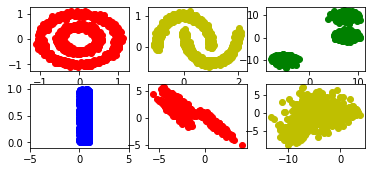

In [283]:
ax1 = plt.subplot(331)
ax1.scatter(A[:,0],A[:,1],c='r')

ax2 = plt.subplot(332)
ax2.scatter(B[:,0],B[:,1],c='y')

ax3 = plt.subplot(333)
ax3.scatter(C[:,0],C[:,1],c='g')

ax4 = plt.subplot(334)
ax4.scatter(D[:,0],D[:,1],c='b')
ax4.set_xlim(-5,5)

ax5 = plt.subplot(335)
ax5.scatter(E[:,0],E[:,1],c='r')

ax6 = plt.subplot(336)
ax6.scatter(F[:,0],F[:,1], c='y')

plt.show()

## Exercise 2
Perform ```K-Means``` clustering on all data sets: https://scikit-learn.org/stable/modules/clustering.html#k-means
* 2.1 plot all results
* 2.2 manually try to find the best $k$ for each data set (by visual evaluation)
* 2.3 Use the ```K-Means++``` initialization 

In [18]:
from sklearn.cluster import KMeans

In [219]:
def showResult(df, model):
    center = model.cluster_centers_
    plt.scatter(df[:,0], df[:,1], c= model.labels_.astype(float), s=50, alpha=0.5)
    plt.scatter(center[:, 0], center[:, 1], c='red', s=50)
    plt.show() 

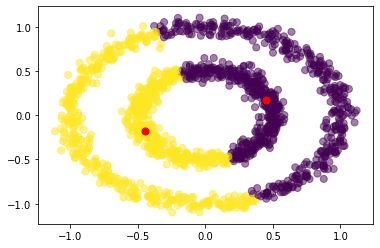

In [220]:
modelA = KMeans(n_clusters=2, random_state=0)
modelA.fit(A)
showResult(A, modelA)

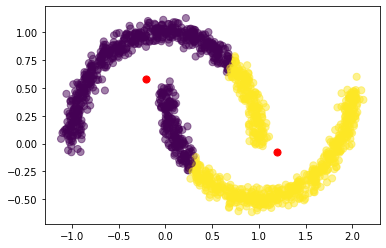

In [221]:
modelB = KMeans(n_clusters=2, random_state=0)
modelB.fit(B)
showResult(B, modelB)

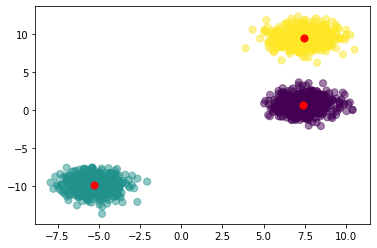

In [224]:
modelC = KMeans(n_clusters=3, random_state=0)
modelC.fit(C)
showResult(C, modelC)

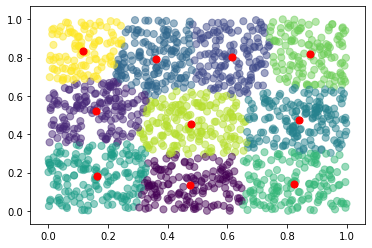

In [231]:
modelD = KMeans(n_clusters=10, random_state=0)
modelD.fit(D)
showResult(D, modelD)

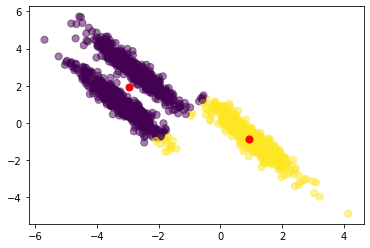

In [233]:
modelE = KMeans(n_clusters=2, random_state=0)
modelE.fit(E)
showResult(E, modelE)

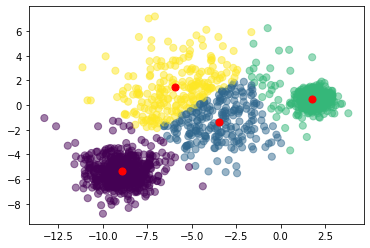

In [236]:
modelF = KMeans(n_clusters=4, random_state=0)
modelF.fit(F)
showResult(F, modelF)

## Exercise 3
Performs ```DBSCAN``` clustering on all data sets and plot all results: https://scikit-learn.org/stable/modules/clustering.html#dbscan

In [238]:
from sklearn.cluster import DBSCAN

In [239]:
def showResultDBSCAN(df, model):
    plt.scatter(df[:,0], df[:,1], c= model.labels_.astype(float), s=50, alpha=0.5)
    plt.show() 

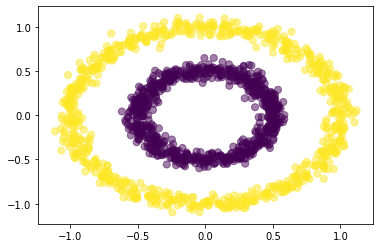

In [242]:
dbscanA = DBSCAN(eps=0.2, min_samples=5)
dbscanA.fit(A)
showResultDBSCAN(A,dbscanA)

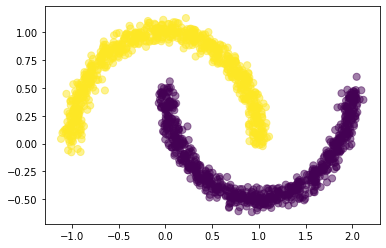

In [243]:
dbscanB = DBSCAN(eps=0.2, min_samples=5)
dbscanB.fit(B)
showResultDBSCAN(B,dbscanB)

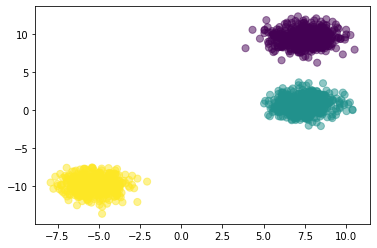

In [247]:
dbscanC = DBSCAN(eps=2, min_samples=5)
dbscanC.fit(C)
showResultDBSCAN(C,dbscanC)

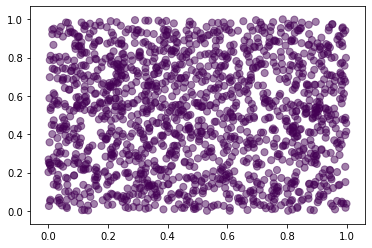

In [270]:
dbscanD = DBSCAN(eps=0.5, min_samples=2)
dbscanD.fit(D)
showResultDBSCAN(D,dbscanD)

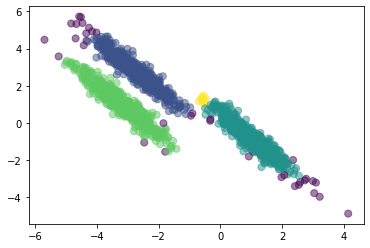

In [277]:
dbscanE = DBSCAN(eps=0.25, min_samples=5)
dbscanE.fit(E)
showResultDBSCAN(E,dbscanE)

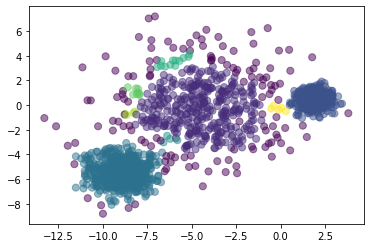

In [282]:
dbscanF = DBSCAN(eps=0.5, min_samples=5)
dbscanF.fit(F)
showResultDBSCAN(F,dbscanF)